In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
from sklearn import model_selection

In [2]:
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()


In [3]:
print(bc)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
import random
trainning_data=[]
trainning_tar=[]
testing_data=[]
testing_tar = []
order = []
totaltemp = [[]for i in range(len(bc.target))]
  
for i in range(len(bc.target)):
    totaltemp[i].append(bc.data[i])
    totaltemp[i].append(bc.target[i])


for i in range(len(bc.target)):
    order.append(i)
random.shuffle(order)
num=1
for i in order:
    if num<=100:
        testing_data.append(totaltemp[i][0])
        testing_tar.append(totaltemp[i][1])
    else:
        trainning_data.append(totaltemp[i][0])
        trainning_tar.append(totaltemp[i][1])
    num=num+1
for i in [trainning_data,trainning_tar,testing_data,testing_tar]:
    i = np.array(i)



In [5]:
classifiers = [
    KNeighborsClassifier(),
    SVC(), 
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(max_iter=1000),
    GaussianNB()]
names = ["K-Nearest Neighbors", "Support Vector Machine",  
         "Decision Tree", "Random Forest", "Neural Networks",
         "Naive Bayes"]

    

In [6]:
# Learn to predict each class against the other
def rocplt(clf,name):
 ###通过decision_function()计算得到的y_score的值，用在roc_curve()函数中    
    if hasattr(clf, "decision_function"):
        y_score= clf.fit(trainning_data, trainning_tar).decision_function(testing_data)
    else:
        y_score = clf.fit(trainning_data, trainning_tar).predict_proba(testing_data)[:, 1] 
    fpr,tpr,threshold = roc_curve(testing_tar, y_score) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值
    
    
    
    
    plt.figure()
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('fig 2-%d: ROC curve of %s' %(fignum,name))
    plt.legend(loc="lower right")
    

   

In [8]:
def parametercal(clf,totaln):
    clf1 = clf.fit(trainning_data, trainning_tar)
    num = 0
    if hasattr(clf, "decision_function"):
        y_score= clf1.decision_function(testing_data)
    else:
        y_score = clf1.predict_proba(testing_data)[:, 1] 
    fpr,tpr,threshold = roc_curve(testing_tar, y_score) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值
    
    for a,b in zip(clf1.predict(testing_data),testing_tar):
        if a==b:
            num=num+1
    return [(num/totaln),roc_auc]

K-Nearest Neighbors
correct rate: 0.930000


<Figure size 432x288 with 0 Axes>

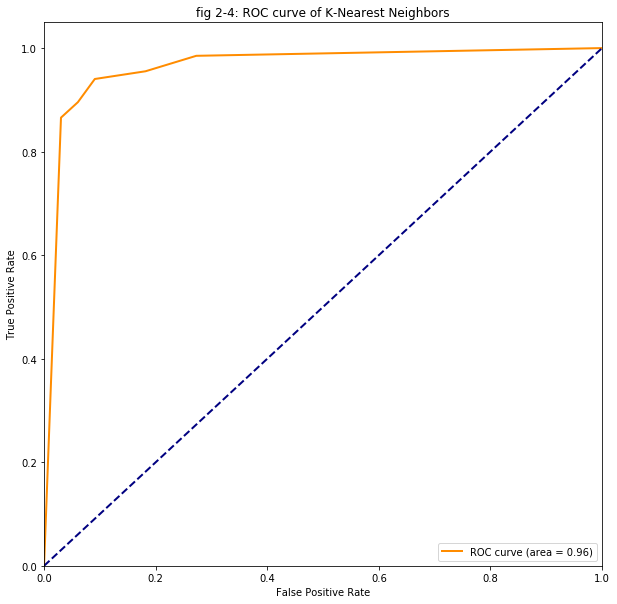

Support Vector Machine
correct rate: 0.890000


<Figure size 432x288 with 0 Axes>

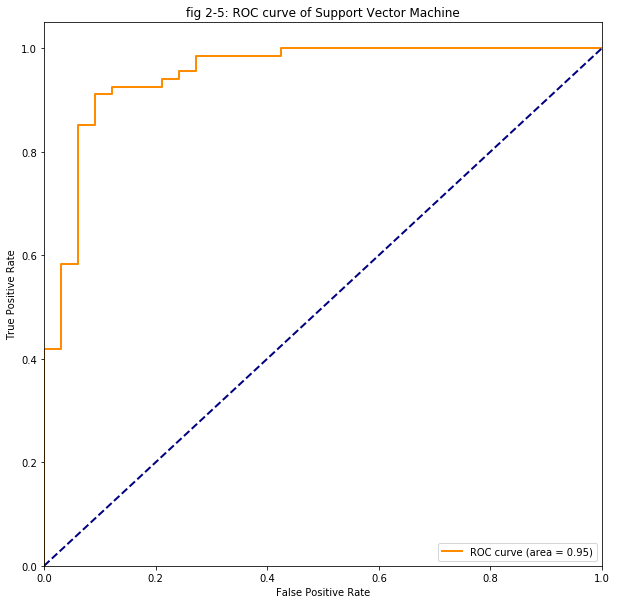

Decision Tree
correct rate: 0.920000


<Figure size 432x288 with 0 Axes>

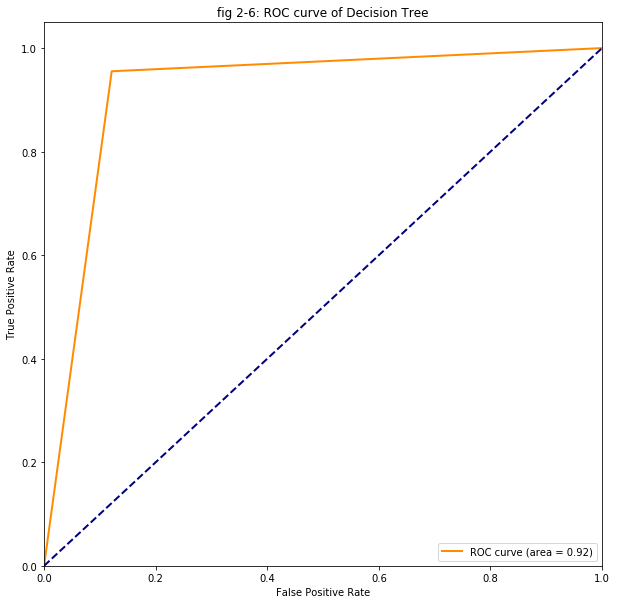

Random Forest
correct rate: 0.940000


<Figure size 432x288 with 0 Axes>

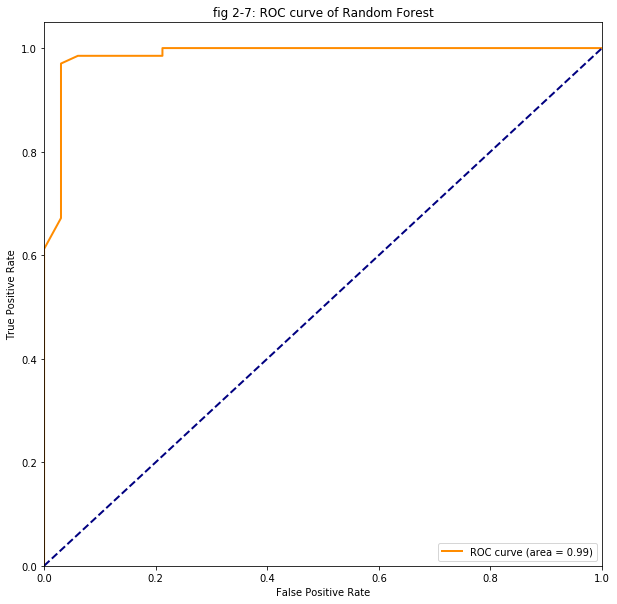

Neural Networks
correct rate: 0.950000


<Figure size 432x288 with 0 Axes>

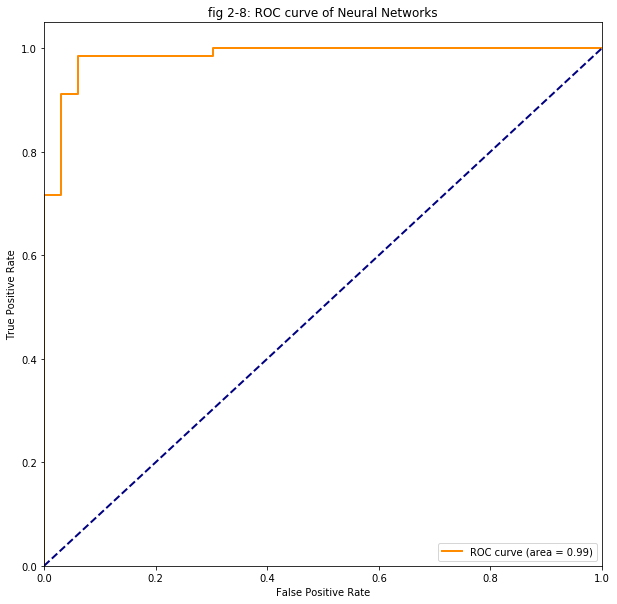

Naive Bayes
correct rate: 0.930000


<Figure size 432x288 with 0 Axes>

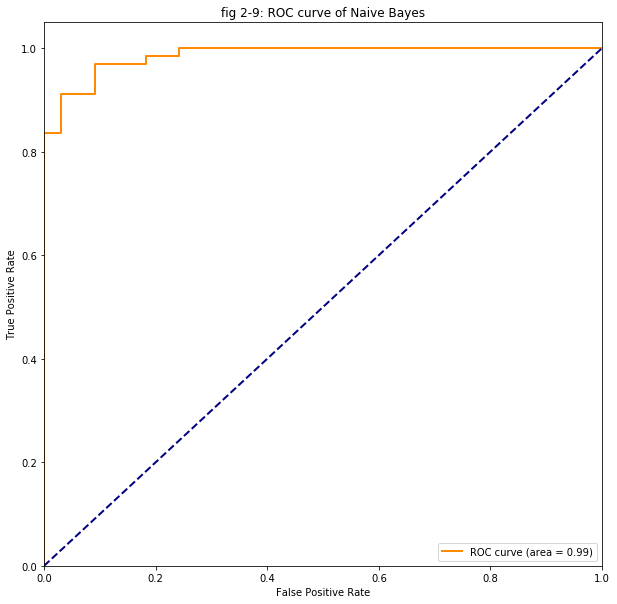

{'K-Nearest Neighbors': 0.93, 'Support Vector Machine': 0.89, 'Decision Tree': 0.95, 'Random Forest': 0.96, 'Neural Networks': 0.96, 'Naive Bayes': 0.93}


In [9]:
fignum = 4
crt={}
for name,clf in zip(names, classifiers):
    print(name)
    rocplt(clf,name)
    crt[name]=parametercal(clf,100)[0]
    print("correct rate: %f"%(parametercal(clf,100)[0]))
    fignum = fignum+1
    plt.show()
print(crt)

In [10]:
from numpy import *
times=100
resultacc={}
resultauc={}
for name,clf in zip(names, classifiers):
    allacc= []
    allauc= []
    for i in range(times):
        allacc= []
        allauc= []
        allauc.append(parametercal(clf,100)[1])
        allacc.append(parametercal(clf,100)[0])
    resultacc[name]=mean(allacc)
    resultauc[name]=mean(allauc)
print(resultacc)
print(resultauc)
    

{'K-Nearest Neighbors': 0.93, 'Support Vector Machine': 0.89, 'Decision Tree': 0.91, 'Random Forest': 0.95, 'Neural Networks': 0.97, 'Naive Bayes': 0.93}
{'K-Nearest Neighbors': 0.963817277250113, 'Support Vector Machine': 0.9502487562189054, 'Decision Tree': 0.9246947082767978, 'Random Forest': 0.9886928991406604, 'Neural Networks': 0.9823609226594301, 'Naive Bayes': 0.9859791949344188}
